# Project 2
Antuan Weeks

## Comments

Q1 -> Good
Q2 -> Good
Q3 -> Good
Q4 -> Good
Q5 -> Good
Q6 -> Good
Q7 -> Good
Q8 -> A multimodal distribution is a distribution w/ more than 1 peak. GPA only has 1 peak. It fits closer to a normal distribution with a skew
Q9 -> Good
Q10 -> while the general idea of normalizing data is correct the skew in this case is too small to correct. 
Q11 -> Good
Q12 -> Good
Q13 -> Good
Q14 -> Good


### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("admissions.csv")
print df_raw.head() #displaying a snapshot of the dataframe

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 398 complete observations. 2 observations are missing gre & gpa while 1 is missing prestige

#### Question 2. Create a summary table

In [4]:
df_raw.describe() #describing or summarizing the available data

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [5]:
df_raw.median() #displaying the medians

admit         0.000
gre         580.000
gpa           3.395
prestige      2.000
dtype: float64

#### Question 3. Why would GRE have a larger STD than GPA?

Answer: the values GRE can take are larger. looking at the ratio of the max values for each variable to the standard deviation, both std values are between 9% and 15% of the max value (see below).

In [6]:
df_raw.gre.std()/df_raw.gre.max() # ratio of gre.std() to gre.max()

0.14453564136441185

In [7]:
df_raw.gpa.std()/df_raw.gpa.max() # ratio of gpa.std() to gpa.max()

0.095157595014153454

#### Question 4. Drop data points with missing data


In [8]:
df_clean = df_raw.dropna(axis=0, how='any') #creating new dataframe to preserve original dataset

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [9]:
df_clean.count() # values dropped -- now all variables feature same number of observations

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 6. Create box plots for GRE and GPA

{'boxes': [<matplotlib.lines.Line2D at 0x117e6b290>],
 'caps': [<matplotlib.lines.Line2D at 0x117e7d110>,
 'fliers': [<matplotlib.lines.Line2D at 0x117e8a410>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x117e7dd90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x117e6b3d0>,
  <matplotlib.lines.Line2D at 0x117e6ba90>]}

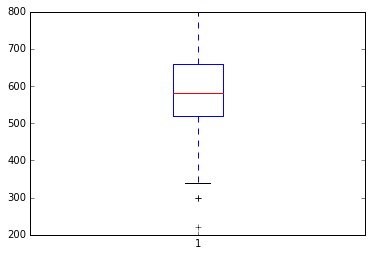

In [10]:
#boxplot gre
plt.boxplot(df_clean['gre'])# showmeans=True) #showmeans option to plot mean value; allows comparison against median

In [11]:
df_clean['gre'].sort_values().head(10) # visualizing outliers depicted in above boxplot

304    220.0
179    300.0
71     300.0
315    300.0
216    340.0
316    340.0
100    340.0
119    340.0
17     360.0
281    360.0
Name: gre, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x1189c3310>],
 'caps': [<matplotlib.lines.Line2D at 0x1189d1190>,
 'fliers': [<matplotlib.lines.Line2D at 0x1189ddad0>],
 'means': [<matplotlib.lines.Line2D at 0x1189dd490>],
 'medians': [<matplotlib.lines.Line2D at 0x1189d1e10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1189c3450>,
  <matplotlib.lines.Line2D at 0x1189c3b10>]}

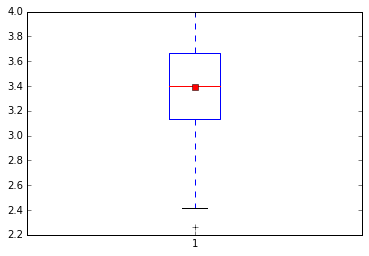

In [12]:
#boxplot gpa
plt.boxplot(df_clean['gpa'], showmeans=True)

#### Question 7. What do these plots show?

Answer: these values show the distribution of the data. the box ends (edges) represent quartile 1 & 3, the box length shows the IQR, the whiskers represent the range _[(Q1 - IQR * 1.5), (Q3 + IQR * 1.5)]_, the red line crossing the blue box represents the median and the square red dot shows mean.

#### Question 8. Describe each distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118a007d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x118d4cf50>]], dtype=object)

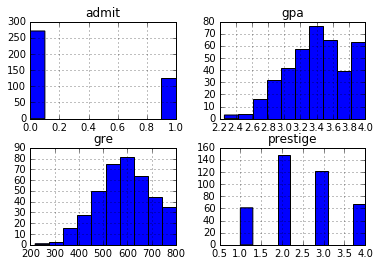

In [13]:
# plot the distribution of each variable 
df_clean.hist()

Answer: Admit is a binomial distribution, as it is a binary outcome variable, taking value 0 or 1. The variables __gre__ and __prestige__ appear to take the form of a normal distribution, while __gpa__ features two peaks, potentially a multimodal distribution.

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: For the model to meet the requirement, we would need our dependent variables to exhibit characteristics of a normal distribtuion. As stated above, the __gpa__ variable does not appear to meet this requirement, therefore we do not meet the normal distribution requirement.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Since the variable __gpa__ does not meet this requirement, we may need to correct some of the outlier values in order to have an accurate model, given its assumption of a normal distribution. If the distribution is not corrected, we cannot rely on the results that are given to us by the model since the assumptions are not met.

#### Question 11. Which of our variables are potentially colinear? 

In [14]:
# create a correlation matrix for the data
df_clean.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


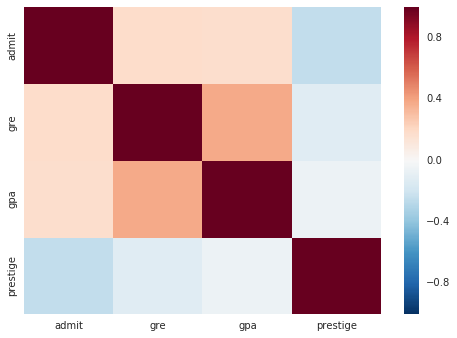

In [15]:
import seaborn as sns #importing here as sns affects the display of matplotlib boxplots above if initiated at start
corr = df_clean.corr()
sns.heatmap(corr) #heatmap using seaborn

#### Question 12. What did you find?

Answer: The variables __gpa__ and __gre__ are strongly correlated. These two variables appear to be collinear.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: We will test the association between grad school admissions rates and prestige of undergraduate schools. To do this, we will run a regression test using admissions rates as the outcome variable and prestige as the independent/predictor variable. Our regression result will allow us to determine the relationship between the predictor and the outcome (direct or inverse) as well as discern if there is a significant relationship at all.

#### Question 14. What is your hypothesis? 

Answer: Prestige alone will not be a sufficient predictor of admissions outcomes. There will be an inverse relationship between admission rate and prestige.

In [16]:
model = sm.regression.linear_model.OLS(df_clean['admit'], exog=df_clean[['prestige', 'gre', 'gpa']])
results = model.fit()
results.summary() #the model returns a negative and significant (95% level) relationship between prestige and admission

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     80.87
Date:                Mon, 20 Jun 2016   Prob (F-statistic):           8.76e-41
Time:                        19:44:20   Log-Likelihood:                -240.27
No. Observations:                 397   AIC:                             486.5
Df Residuals:                     394   BIC:                             498.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
prestige      -0.1158      0.022     -5.189      0.000        -0.160    -0.072
gre            0.0004      0.000      1.949      0.052      -3.4e-06     0.001
gpa            0.1097      0.040      2.745      0.006         0.031     0.188
==============================================================================
Omnibus:                      202.929   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.585
Skew:                           0.679   Prob(JB):                     3.81e-12
Kurtosis:                       1.845   Cond. No.                     1.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

In [17]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [18]:
null_gre = df_raw['gre'].sort_values()
null_gre.tail() #displaying index of missing gre values (187, 212)

369    800.0
77     800.0
25     800.0
187      NaN
212      NaN
Name: gre, dtype: float64

In [19]:
null_gpa = df_raw['gpa'].sort_values()
null_gpa.tail() #displaying index of missing gpa value (236)

70     4.0
252    4.0
310    4.0
187    NaN
236    NaN
Name: gpa, dtype: float64

In [20]:
df_clean1 = df_raw.drop([187, 212, 236], axis=0)

In [21]:
df_clean1.describe() #returns a dataframe equivalent to .dropna() method

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


In [22]:
df_raw[df_raw.isnull().any(axis=1)] #displaying indices with missing value

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0
236,1,660.0,NaN,NaN


In [23]:
df_clean2 = df_raw.drop([187, 212, 236])

In [24]:
df_clean2.describe() #also returns equivalent dataframe

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


In [25]:
df_clean3 = df_raw[df_raw.isnull().any(axis=1) == False]

In [26]:
df_clean3.describe() #not materially different, but accomplished with 1 line

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### 2. Bonus: Log transform the skewed data

In [27]:
df_gpa = df_clean['gpa'] #creating segment datasets in preparation for log transform
df_segment = df_clean[['gre', 'prestige', 'admit']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119d87dd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11a51ab50>]], dtype=object)

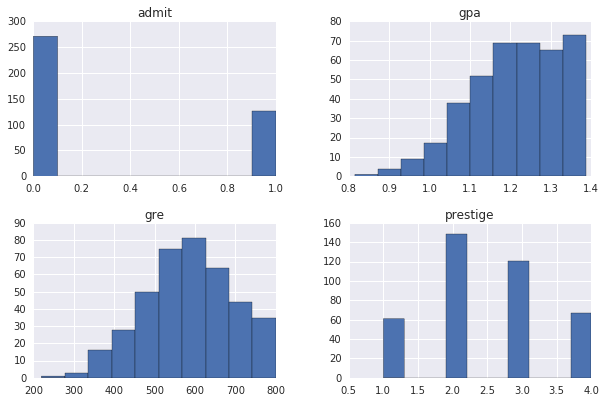

In [28]:
df_logtransform = pd.concat([df_segment, df_gpa.apply(np.log).add_suffix(("_log"))], axis=1) #courtesy aerlinger
df_logtransform.hist(figsize=(10, 10), layout=(3, 2))

In [29]:
df_clean.skew()

admit       0.787669
gre        -0.146047
gpa        -0.216889
prestige    0.086506
dtype: float64

In [30]:
df_logtransform.skew()

gre        -0.146047
prestige    0.086506
admit       0.787669
gpa        -0.475651
dtype: float64

Following transformation, __gpa__ data is even more skewed

#### 3. Advanced: Impute missing data

In [31]:
import scipy as scy #initially imported this so that I could use different options within interpolate

In [32]:
df_imputed = df_raw.interpolate()

In [33]:
df_imputed.describe() #showing that the values are no longer null

,admit,gre,gpa,prestige
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,588.025000,3.391138,2.48500
std,0.466087,115.352133,0.379743,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [34]:
df_imputed.iloc[187] #displaying the interpolated values

admit         0.00
gre         560.00
gpa           3.34
prestige      2.00
Name: 187, dtype: float64

In [35]:
df_imputed.iloc[212]

admit         0.00
gre         610.00
gpa           2.87
prestige      2.00
Name: 212, dtype: float64

In [36]:
df_imputed.iloc[236]

admit         1.000
gre         660.000
gpa           3.525
prestige      2.000
Name: 236, dtype: float64